In [1]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from random import randint
from time import sleep
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [3]:
pd.set_option('display.max_columns', None)
df_data = pd.read_csv('df_data.csv')
df_data.head()

,artist,song,popularity,uri,url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,0
0,Nosaj Thing,2K,0,spotify:track:33xMbeHzmWd6Od0BmLZEUs,https://open.spotify.com/track/33xMbeHzmWd6Od0...,0.310,0.445,7.0,-13.355,0.0,0.0863,0.0940,0.06780,0.1130,0.122,95.360,audio_features,33xMbeHzmWd6Od0BmLZEUs,https://api.spotify.com/v1/tracks/33xMbeHzmWd6...,https://api.spotify.com/v1/audio-analysis/33xM...,152560.0,3.0,NaN
1,The Doors,4 Billion Souls,24,spotify:track:3UnyplmZaq547hwsfOR5yy,https://open.spotify.com/track/3UnyplmZaq547hw...,0.419,0.565,5.0,-11.565,1.0,0.0347,0.1370,0.33700,0.1280,0.648,151.277,audio_features,3UnyplmZaq547hwsfOR5yy,https://api.spotify.com/v1/tracks/3UnyplmZaq54...,https://api.spotify.com/v1/audio-analysis/3Uny...,197707.0,4.0,NaN
2,Radiohead,4 Minute Warning,0,spotify:track:1w8QCSDH4QobcQeT4uMKLm,https://open.spotify.com/track/1w8QCSDH4QobcQe...,0.354,0.302,9.0,-13.078,1.0,0.0326,0.5900,0.07090,0.1110,0.223,123.753,audio_features,1w8QCSDH4QobcQeT4uMKLm,https://api.spotify.com/v1/tracks/1w8QCSDH4Qob...,https://api.spotify.com/v1/audio-analysis/1w8Q...,244285.0,4.0,NaN
3,Vitas,7 Element,0,spotify:track:7J9mBHG4J2eIfDAv5BehKA,https://open.spotify.com/track/7J9mBHG4J2eIfDA...,0.727,0.785,5.0,-6.707,0.0,0.0603,0.3250,0.12600,0.3100,0.960,129.649,audio_features,7J9mBHG4J2eIfDAv5BehKA,https://api.spotify.com/v1/tracks/7J9mBHG4J2eI...,https://api.spotify.com/v1/audio-analysis/7J9m...,249940.0,4.0,NaN
4,R.E.M.,#9 Dream,6,spotify:track:1VZedwJj1gyi88WFRhfThb,https://open.spotify.com/track/1VZedwJj1gyi88W...,0.571,0.724,0.0,-5.967,1.0,0.0260,0.0231,0.00311,0.0919,0.385,116.755,audio_features,1VZedwJj1gyi88WFRhfThb,https://api.spotify.com/v1/tracks/1VZedwJj1gyi...,https://api.spotify.com/v1/audio-analysis/1VZe...,278320.0,4.0,NaN


In [4]:
df_data = df_data.drop_duplicates(subset=['uri'])

In [6]:
df_clustering = df_data.drop(['artist', 'song', 'uri', 'url', 'id', 'type','track_href', 'analysis_url'], axis = 1)

In [7]:
df_clustering = df_clustering.drop(['0'], axis = 1)

In [8]:
df_clustering.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,9894.0,27.644431,26.530478,0.0,0.000000,27.000000,51.000000,97.000
danceability,9894.0,0.567907,0.158812,0.0,0.462000,0.575000,0.680000,0.980
energy,9894.0,0.617954,0.234347,0.0,0.459000,0.654000,0.810000,0.998
key,9894.0,5.197696,3.590892,0.0,2.000000,5.000000,8.000000,11.000
loudness,9894.0,-8.168704,4.297984,-60.0,-9.927000,-7.255500,-5.309250,-0.475
mode,9894.0,0.649181,0.477250,0.0,0.000000,1.000000,1.000000,1.000
speechiness,9894.0,0.072710,0.081872,0.0,0.033500,0.043400,0.070400,0.963
acousticness,9894.0,0.291830,0.316099,0.0,0.023225,0.148000,0.525000,0.996
instrumentalness,9894.0,0.118410,0.261598,0.0,0.000000,0.000116,0.029975,0.996
liveness,9894.0,0.191983,0.163745,0.0,0.096600,0.124000,0.237000,0.997


In [9]:
df_clustering

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,0.310,0.445,7.0,-13.355,0.0,0.0863,0.09400,0.067800,0.1130,0.122,95.360,152560.0,3.0
1,24,0.419,0.565,5.0,-11.565,1.0,0.0347,0.13700,0.337000,0.1280,0.648,151.277,197707.0,4.0
2,0,0.354,0.302,9.0,-13.078,1.0,0.0326,0.59000,0.070900,0.1110,0.223,123.753,244285.0,4.0
3,0,0.727,0.785,5.0,-6.707,0.0,0.0603,0.32500,0.126000,0.3100,0.960,129.649,249940.0,4.0
4,6,0.571,0.724,0.0,-5.967,1.0,0.0260,0.02310,0.003110,0.0919,0.385,116.755,278320.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10003,73,0.651,0.801,0.0,-7.340,1.0,0.0514,0.12300,0.000000,0.0825,0.776,133.769,200480.0,4.0
10004,1,0.811,0.647,0.0,-10.989,1.0,0.0498,0.08230,0.681000,0.0572,0.990,139.787,191560.0,4.0
10005,24,0.686,0.610,7.0,-5.902,1.0,0.0262,0.19000,0.000931,0.0710,0.766,80.567,206293.0,4.0
10006,47,0.711,0.718,6.0,-5.739,1.0,0.0380,0.00824,0.002080,0.0732,0.688,117.071,200293.0,4.0


In [10]:
df_clustering = df_clustering.drop(['mode'], axis = 1)

In [11]:
df_clustering = df_clustering.drop(['key'], axis = 1)

In [12]:
df_clustering = df_clustering.drop(['popularity'], axis = 1)

In [13]:

df_clustering.to_csv("df_clustering.csv", index = False)

In [14]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(df_clustering)
pd.DataFrame(X_prep,columns=df_clustering.columns).head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-1.624058,-0.738064,-1.206742,0.165996,-0.625880,-0.193474,-0.482378,-1.467342,-0.872234,-0.923948,-2.342801
1,-0.937678,-0.225976,-0.790247,-0.464291,-0.489840,0.835638,-0.390768,0.654823,1.079304,-0.400443,0.210308
2,-1.346987,-1.348302,-1.142290,-0.489942,0.943328,-0.181623,-0.494593,-1.059854,0.118699,0.139655,0.210308
3,1.001819,0.712851,0.340108,-0.151590,0.104941,0.029016,0.720772,1.913597,0.324473,0.205228,0.210308
4,0.019476,0.452540,0.512290,-0.570560,-0.850188,-0.440774,-0.611244,-0.406260,-0.125535,0.534310,0.210308


Text(0.5, 1.0, 'look at the Elbow')

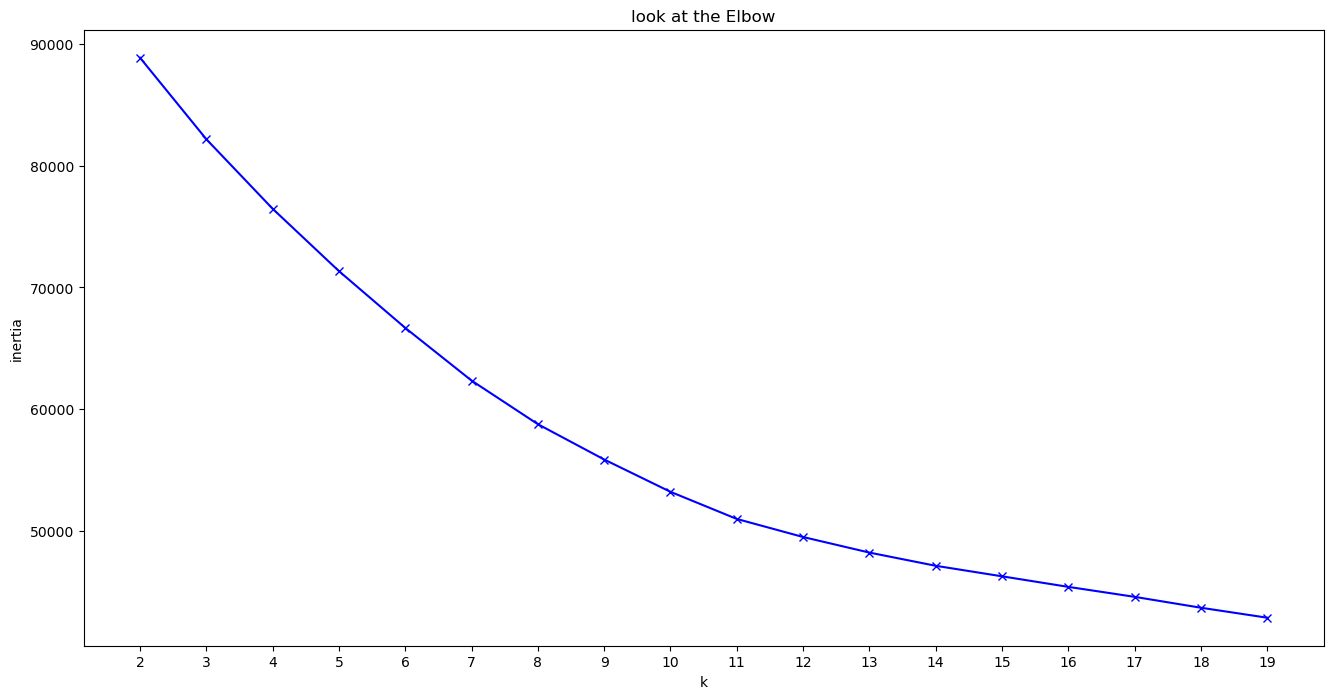

In [16]:
from sklearn.cluster import KMeans
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_) 
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('look at the Elbow')

Text(0.5, 1.0, 'Slhouette score')

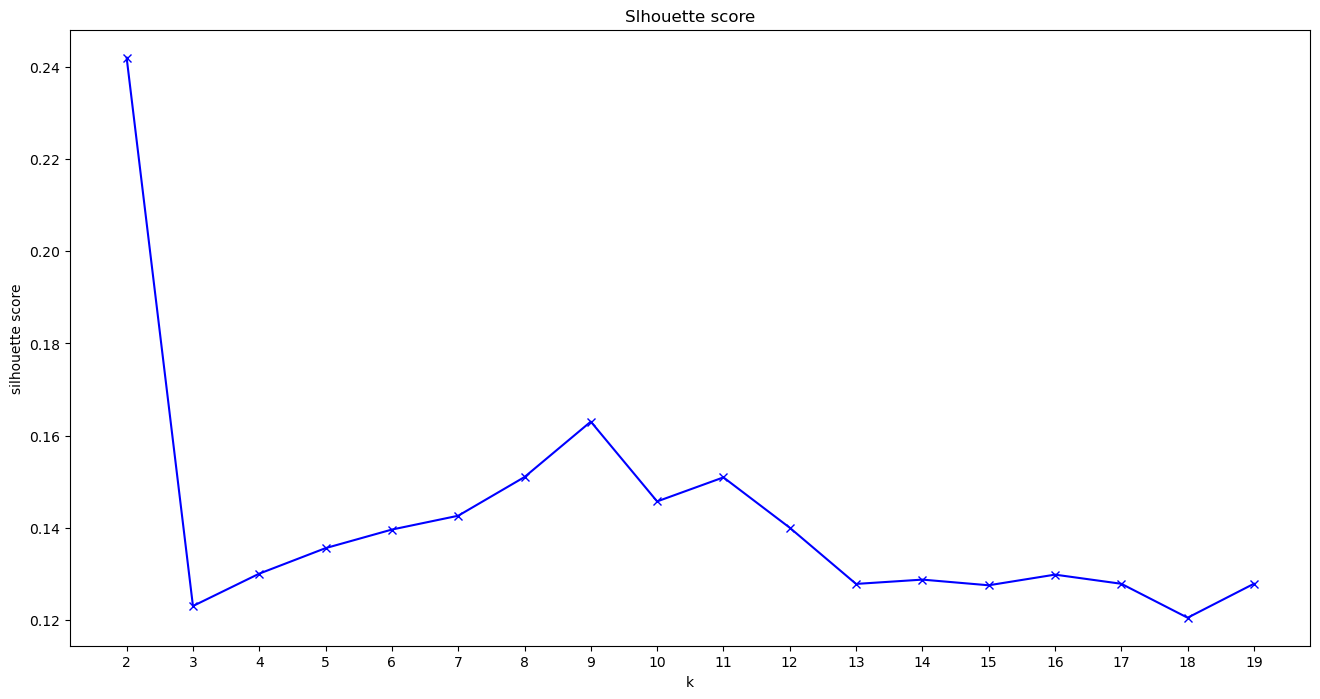

In [17]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score')


In [18]:
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0      738
1     1415
2      719
3      862
4      309
5      525
6      706
7      273
8      203
9      248
10     783
11    1191
12      77
13      33
14     362
15     197
16      37
17     543
18     673
dtype: int64

In [19]:
df_data = df_data.assign(clusters = clusters)
df_data

,artist,song,popularity,uri,url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,0,clusters
0,Nosaj Thing,2K,0,spotify:track:33xMbeHzmWd6Od0BmLZEUs,https://open.spotify.com/track/33xMbeHzmWd6Od0...,0.310,0.445,7.0,-13.355,0.0,0.0863,0.09400,0.067800,0.1130,0.122,95.360,audio_features,33xMbeHzmWd6Od0BmLZEUs,https://api.spotify.com/v1/tracks/33xMbeHzmWd6...,https://api.spotify.com/v1/audio-analysis/33xM...,152560.0,3.0,NaN,7
1,The Doors,4 Billion Souls,24,spotify:track:3UnyplmZaq547hwsfOR5yy,https://open.spotify.com/track/3UnyplmZaq547hw...,0.419,0.565,5.0,-11.565,1.0,0.0347,0.13700,0.337000,0.1280,0.648,151.277,audio_features,3UnyplmZaq547hwsfOR5yy,https://api.spotify.com/v1/tracks/3UnyplmZaq54...,https://api.spotify.com/v1/audio-analysis/3Uny...,197707.0,4.0,NaN,3
2,Radiohead,4 Minute Warning,0,spotify:track:1w8QCSDH4QobcQeT4uMKLm,https://open.spotify.com/track/1w8QCSDH4QobcQe...,0.354,0.302,9.0,-13.078,1.0,0.0326,0.59000,0.070900,0.1110,0.223,123.753,audio_features,1w8QCSDH4QobcQeT4uMKLm,https://api.spotify.com/v1/tracks/1w8QCSDH4Qob...,https://api.spotify.com/v1/audio-analysis/1w8Q...,244285.0,4.0,NaN,0
3,Vitas,7 Element,0,spotify:track:7J9mBHG4J2eIfDAv5BehKA,https://open.spotify.com/track/7J9mBHG4J2eIfDA...,0.727,0.785,5.0,-6.707,0.0,0.0603,0.32500,0.126000,0.3100,0.960,129.649,audio_features,7J9mBHG4J2eIfDAv5BehKA,https://api.spotify.com/v1/tracks/7J9mBHG4J2eI...,https://api.spotify.com/v1/audio-analysis/7J9m...,249940.0,4.0,NaN,1
4,R.E.M.,#9 Dream,6,spotify:track:1VZedwJj1gyi88WFRhfThb,https://open.spotify.com/track/1VZedwJj1gyi88W...,0.571,0.724,0.0,-5.967,1.0,0.0260,0.02310,0.003110,0.0919,0.385,116.755,audio_features,1VZedwJj1gyi88WFRhfThb,https://api.spotify.com/v1/tracks/1VZedwJj1gyi...,https://api.spotify.com/v1/audio-analysis/1VZe...,278320.0,4.0,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10003,The Clash,London Calling - Remastered,73,spotify:track:5jzma6gCzYtKB1DbEwFZKH,https://open.spotify.com/track/5jzma6gCzYtKB1D...,0.651,0.801,0.0,-7.340,1.0,0.0514,0.12300,0.000000,0.0825,0.776,133.769,audio_features,5jzma6gCzYtKB1DbEwFZKH,https://api.spotify.com/v1/tracks/5jzma6gCzYtK...,https://api.spotify.com/v1/audio-analysis/5jzm...,200480.0,4.0,NaN,1
10004,War,Low Rider,1,spotify:track:2fmMPJb5EzZCx8BcNJvVk4,https://open.spotify.com/track/2fmMPJb5EzZCx8B...,0.811,0.647,0.0,-10.989,1.0,0.0498,0.08230,0.681000,0.0572,0.990,139.787,audio_features,2fmMPJb5EzZCx8BcNJvVk4,https://api.spotify.com/v1/tracks/2fmMPJb5EzZC...,https://api.spotify.com/v1/audio-analysis/2fmM...,191560.0,4.0,NaN,17
10005,Moby,Flower,24,spotify:track:60rIdEPDrzyLiLC0icp3xz,https://open.spotify.com/track/60rIdEPDrzyLiLC...,0.686,0.610,7.0,-5.902,1.0,0.0262,0.19000,0.000931,0.0710,0.766,80.567,audio_features,60rIdEPDrzyLiLC0icp3xz,https://api.spotify.com/v1/tracks/60rIdEPDrzyL...,https://api.spotify.com/v1/audio-analysis/60rI...,206293.0,4.0,NaN,1
10006,The Cat Empire,Brighter Than Gold,47,spotify:track:0sEm1ld0V8YTCPcjPVfIsc,https://open.spotify.com/track/0sEm1ld0V8YTCPc...,0.711,0.718,6.0,-5.739,1.0,0.0380,0.00824,0.002080,0.0732,0.688,117.071,audio_features,0sEm1ld0V8YTCPcjPVfIsc,https://api.spotify.com/v1/tracks/0sEm1ld0V8YT...,https://api.spotify.com/v1/audio-analysis/0sEm...,200293.0,4.0,NaN,1


In [20]:
df_data.to_csv("List2.csv", index = False)

In [28]:
reference=pd.read_csv('List2.csv')


In [ ]:
artist = input("who's song you like? ")
title = input("What song you like")
print("\n")
music = [artist,title]

if title in top100.values:
    print("Try this song next!")
    print("\n")
    print(str(top100.sample(n=1)).title())